In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [4]:
base_dir = 'C:/Users/ferdi/Desktop/proje/wheat' 
train_dir = os.path.join(base_dir, 'train') 

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

Found 600 images belonging to 3 classes.


In [7]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [8]:
base_model.trainable = False

In [22]:
from tensorflow.keras.layers import BatchNormalization

x = base_model.output
#x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x) 
predictions = Dense(3, activation='softmax')(x)


In [23]:
model = Model(inputs=base_model.input, outputs=predictions)

In [24]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history6 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,epochs=40)

Epoch 1/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 15s 329ms/step - accuracy: 0.5443 - loss: 1.3273
Epoch 2/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.5000 - loss: 0.5762 
Epoch 3/40


C:\Users\ferdi\anaconda3\envs\bitirme_2\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 338ms/step - accuracy: 0.7797 - loss: 0.5317
Epoch 4/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.8750 - loss: 0.1510
Epoch 5/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 327ms/step - accuracy: 0.8526 - loss: 0.3927
Epoch 6/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.9375 - loss: 0.1229
Epoch 7/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 340ms/step - accuracy: 0.8530 - loss: 0.3938
Epoch 8/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - accuracy: 1.0000 - loss: 0.0512
Epoch 9/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 329ms/step - accuracy: 0.8669 - loss: 0.3405
Epoch 10/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.8750 - loss: 0.1087
Epoch 11/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 334ms/step - accuracy: 0.7972 - loss: 0.4554
Epoch 12/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step - accuracy: 0.8125 - loss: 0.2365
Epoch 13/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 331ms/step - accuracy: 0.8692 - loss: 0.3492
Epoch 14/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - 

In [26]:
histories = [history5, history6]
history_labels = ['Model 5', 'Model 6']

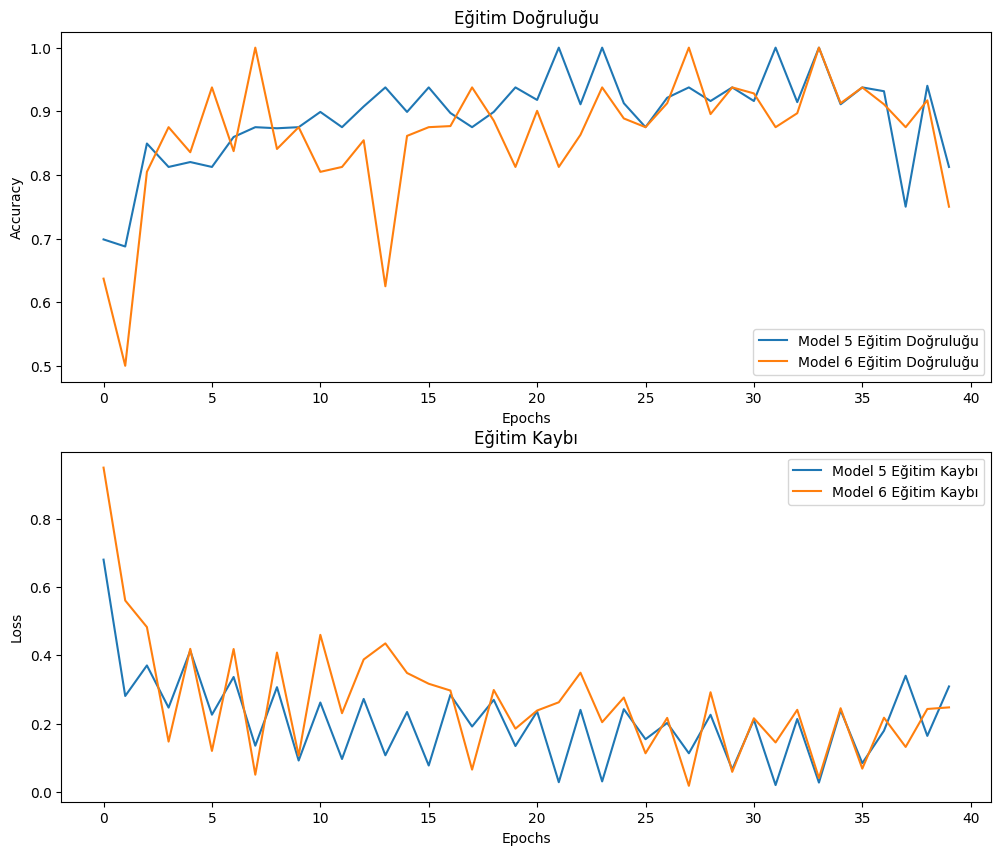

In [27]:
#Toplu grafik çizdirip karşılaştırma yapma

plt.figure(figsize=(12, 10))
        # Accuracy 
plt.subplot(2, 1, 1)
for history, label in zip(histories, history_labels):
    acc = history.history['accuracy']
    plt.plot(acc, label=f'{label} Eğitim Doğruluğu')
plt.legend(loc='lower right')
plt.title('Eğitim Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

    # Loss 
plt.subplot(2, 1, 2)
for history, label in zip(histories, history_labels):
    loss = history.history['loss']
    plt.plot(loss, label=f'{label} Eğitim Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
    
plt.show()

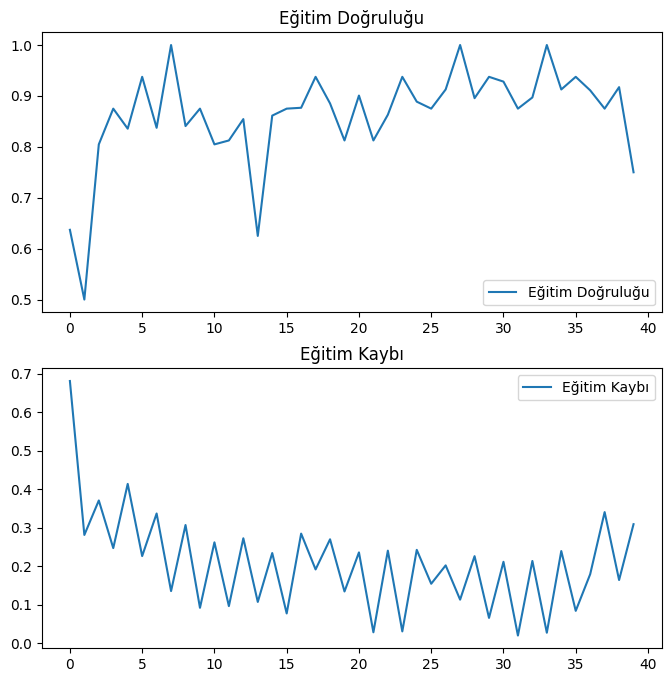

In [41]:
# Tekli grafik çizdirme

acc = history6.history['accuracy']
loss = history5.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Eğitim Doğruluğu')
plt.legend(loc='lower right')
plt.title('Eğitim Doğruluğu')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Eğitim Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim Kaybı')
plt.show()


In [14]:
test_dir=os.path.join(base_dir, 'val') 

In [36]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,  
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

Found 96 images belonging to 3 classes.


In [37]:
predictions = model.predict(test_generator, steps=test_generator.samples//test_generator.batch_size)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

C:\Users\ferdi\anaconda3\envs\bitirme_2\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step


In [38]:
print(len(predicted_classes))

96


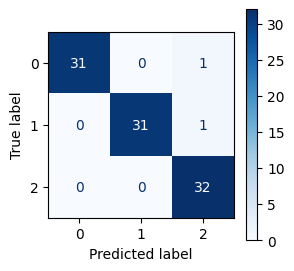

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix hesaplama
cm = confusion_matrix(true_classes, predicted_classes, labels=np.arange(3))  # 3 sınıf var

# Confusion matrix çizdirme
fig, ax = plt.subplots(figsize=(3, 3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(3))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

In [40]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(true_classes, predicted_classes, labels=np.arange(3), output_dict=True)

f1_scores = pd.DataFrame(report).transpose()

#print the F1 scores
print(f1_scores[['f1-score']])

              f1-score
0             0.984127
1             0.984127
2             0.969697
accuracy      0.979167
macro avg     0.979317
weighted avg  0.979317


In [33]:
model.save('modelwheat_v2.0.0.h5')

In [34]:
model.save('modelwheat_v2.0.0.keras')